## 插值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

设置**Numpuy**浮点数显示格式：

In [2]:
np.set_printoptions(precision=2, suppress=True)

从文本中读入数据，数据来自 http://kinetics.nist.gov/janaf/html/C-067.txt ，保存为结构体数组：

In [11]:
data = np.genfromtxt("C-067.txt",
                     delimiter="\t",  # TAB分隔
                     skip_header=1,    # 忽略首行
                     names = True,    # 读入属性
                     missing_values="INFINITE", #缺失直
                     filling_values=np.inf )  #填充缺失值      

(skiprows更新了，换成了skip_header)
显示部分数据：

In [17]:
for row in data[:7]:
    print("{}\t{}".format(row['TK'],row["Cp"]))
print("...\t...")

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


绘图：

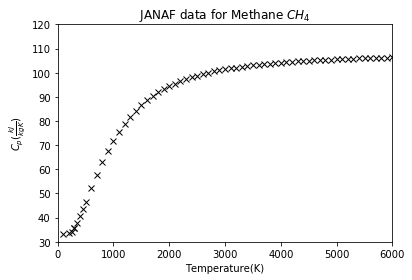

In [18]:
p = plt.plot(data['TK'],data['Cp'],'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature(K)")
y = plt.ylabel(r"$C_p$($\frac{kJ}{kg K}$)")

### 插值

假设我们要对这组数据进行插值。

先导入一维插值函数interp1d：

        interp1d(x,y)

In [19]:
from scipy.interpolate import interp1d

In [20]:
ch4_cp = interp1d(data['TK'],data['Cp'])

interp1d的返回值可以像函数一样接受输入，并返回插值的结果。

单个输入直，注意返回的是数组：

In [21]:
ch4_cp(382.2)

array(39.565144000000004)

输入数组，返回的是对应的数组：

In [22]:
ch4_cp([32.2,323.2])

array([ 10.71,  36.71])

默认情况下，输入直要在插值允许的范围内，否则插值会报错：

In [23]:
ch4_cp(8752)

ValueError: A value in x_new is above the interpolation range.

但是我们可以通过参数设置允许超出范围的值存在：

In [24]:
ch4_cp = interp1d(data['TK'],data['Cp'],
                 bounds_error=False)

不过由于超出范围，所以插值的输出是非法值：

In [25]:
ch4_cp(8752)

array(nan)

可以使用指定值代替这些非法值：

In [27]:
ch4_cp = interp1d(data['TK'],data['Cp'],
                 bounds_error=False,fill_value=999.25)

In [28]:
ch4_cp(8752)

array(999.25)

### 线性插值

interp1d默认的插值方法是线性，关于线性插值的定义，请参见：

* 维基百科-线性插值  https://zh.wikipedia.org/wiki/%E7%BA%BF%E6%80%A7%E6%8F%92%E5%80%BC
* 百度百科-线性插值  http://baike.baidu.com/item/%E7%BA%BF%E6%80%A7%E6%8F%92%E5%80%BC%E6%B3%95

其基本思想是，已知两相邻点$x_1$,$x_2$对应的值$y_1$,$y_2$,那么对于（$x_1$,$x_2$）之间的某一点$x$，线性插值对应的直$y$满足：点($x$,$y$)在（$x_1$,$y_1$）,($x_2$,$y_2$)所形成的线段上。

应用线性插值：

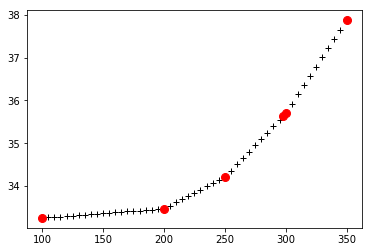

In [30]:
T = np.arange(100,355,5)
plt.plot(T,ch4_cp(T),"+k")
p = plt.plot(data['TK'][1:7],data['Cp'][1:7],'ro',markersize=8)

其中红色的圆点为原来的数据点，黑色的十字点为对应的插值点，可以明显的看到，相邻的数据点的插值在一条直线上。

### 多项式插值

我们可以通过kind参数来调节使用的插值方法，来得到不同的结果：

* nearest 最近邻插值
* zero 0阶插值
* linear 线性插值
* quadratic 二次插值
* cubic 三次插值
* 4，5，6，7更高阶次插值

最近邻插值：